ANÁLISIS COMPLETO DE K-MEANS: SEGMENTACIÓN DE CLIENTES

1. PREPARACIÓN DE LOS DATOS
--------------------------------------------------
Dataset creado con 400 clientes y 5 características

Primeras 5 filas del dataset:
        edad  ingreso_anual  score_gasto  experiencia_cliente  num_compras_mes
0  27.483571   20000.000000    55.366810                    8               11
1  24.308678   26634.837418    58.411768                   10                4
2  28.238443   27258.283868    66.245769                    7                6
3  32.615149   23581.781846    65.807031                    6                9
4  23.829233   28709.714307    29.334959                    6                1

Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   edad                 400 non-null    float64
 1   ingreso_anual   

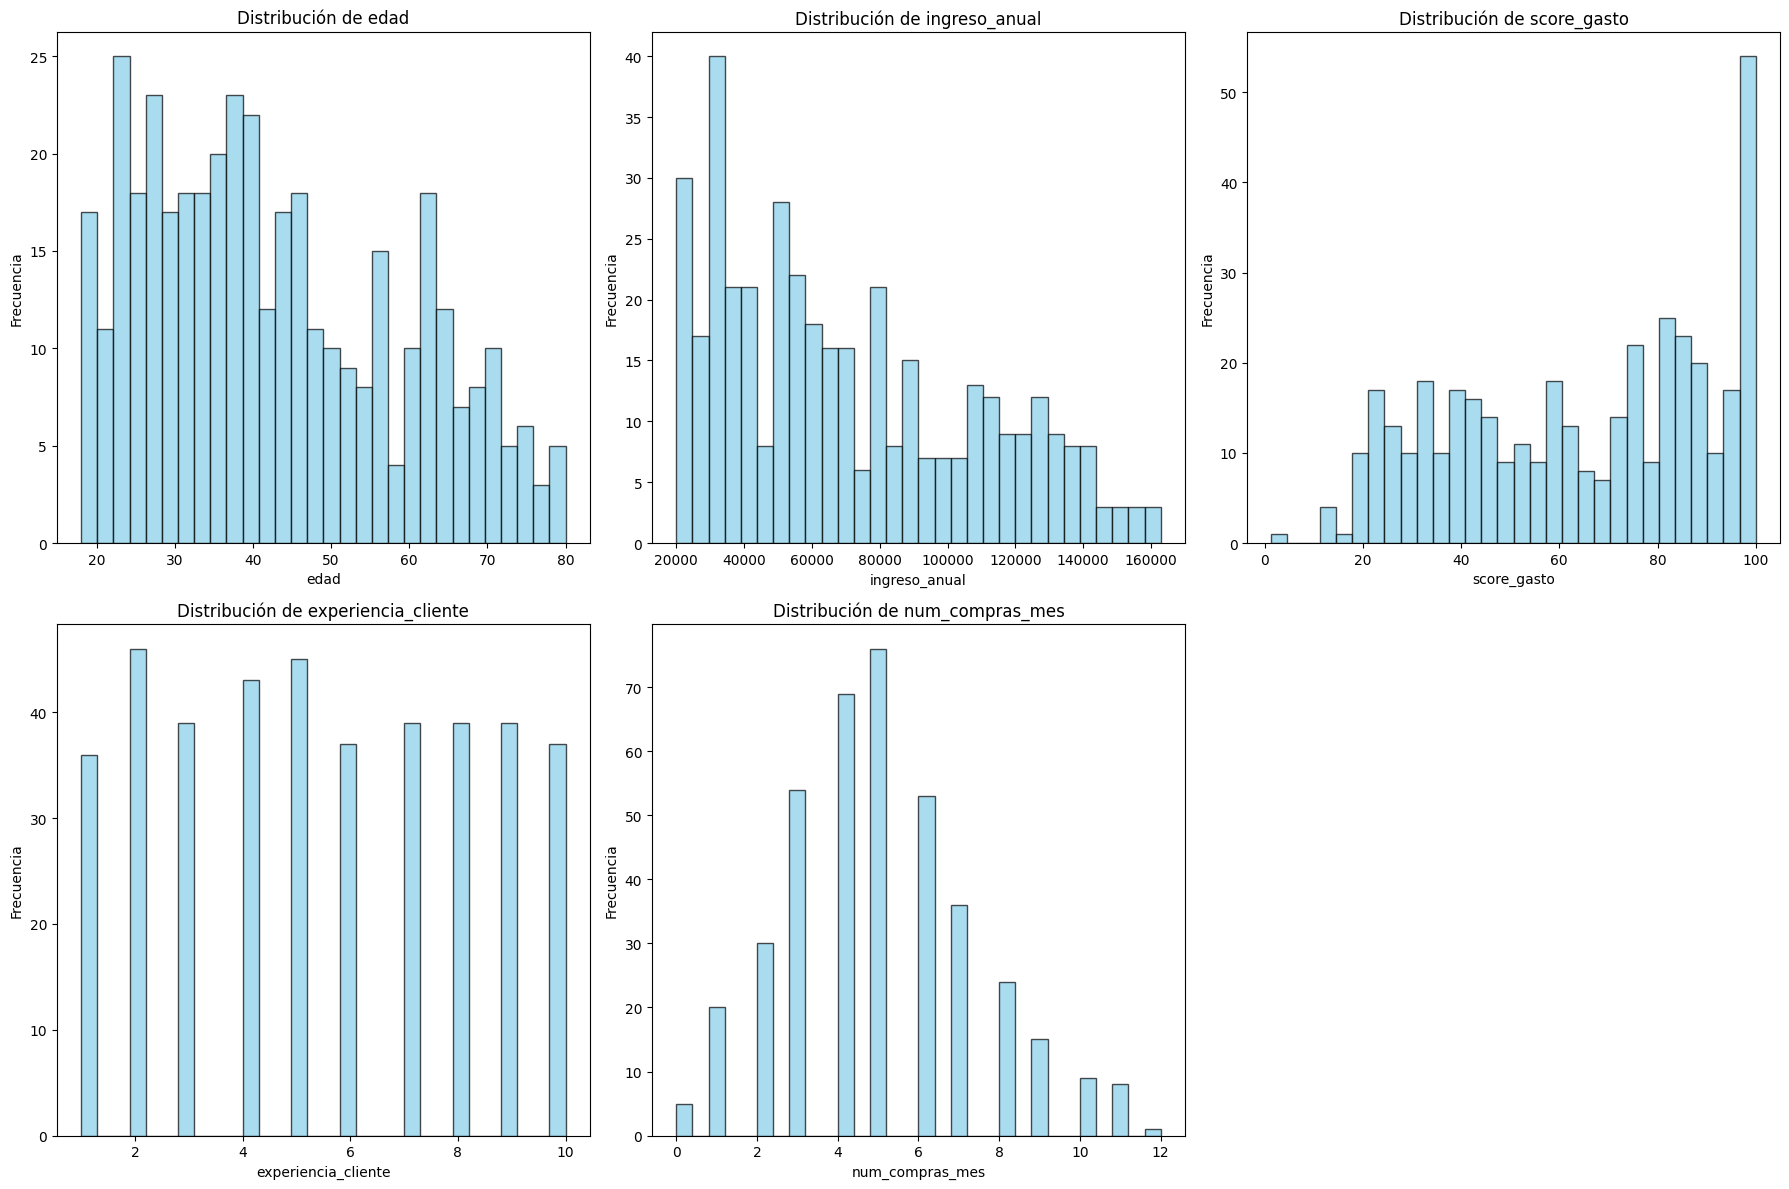


Matriz de correlación:
                         edad  ingreso_anual  score_gasto  \
edad                 1.000000      -0.045900    -0.359365   
ingreso_anual       -0.045900       1.000000     0.714108   
score_gasto         -0.359365       0.714108     1.000000   
experiencia_cliente -0.046610       0.008820    -0.002363   
num_compras_mes      0.000381      -0.024644     0.014331   

                     experiencia_cliente  num_compras_mes  
edad                           -0.046610         0.000381  
ingreso_anual                   0.008820        -0.024644  
score_gasto                    -0.002363         0.014331  
experiencia_cliente             1.000000         0.009518  
num_compras_mes                 0.009518         1.000000  


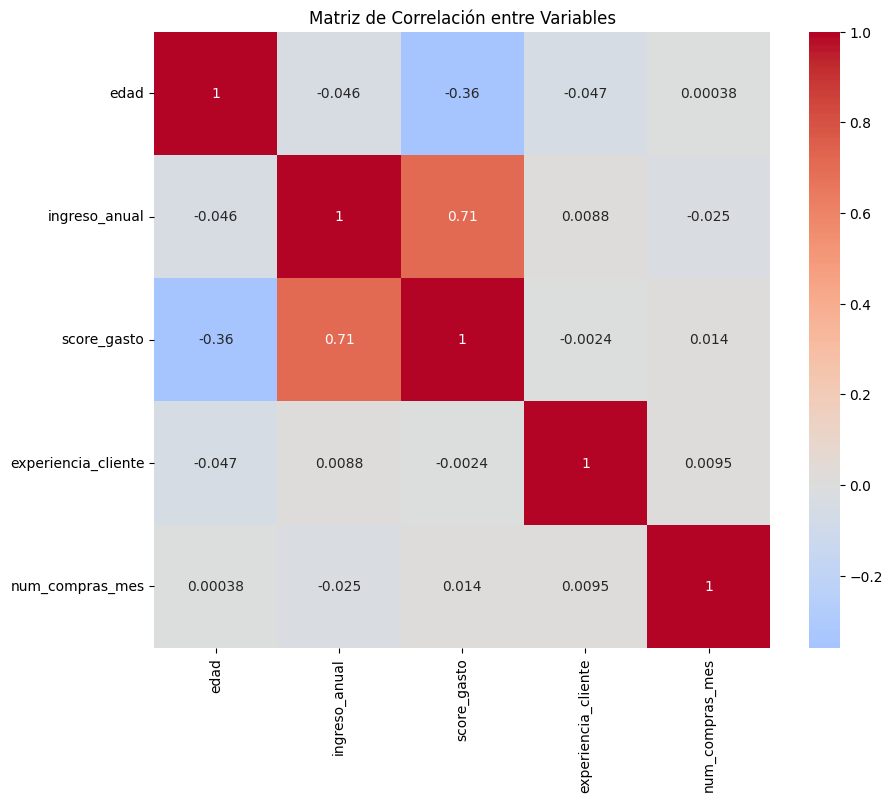


3. LIMPIEZA Y TRANSFORMACIÓN DE DATOS
--------------------------------------------------
✓ No se encontraron valores nulos
✓ Los outliers detectados están dentro de rangos esperables

Características seleccionadas para clustering: ['edad', 'ingreso_anual', 'score_gasto']
Justificación: Estas tres variables capturan los aspectos más importantes
del comportamiento del cliente: demografía (edad), capacidad económica
(ingreso) y patrones de consumo (score de gasto)

4. ESCALADO DE VARIABLES
--------------------------------------------------
Antes del escalado:
             edad  ingreso_anual  score_gasto
count  400.000000     400.000000   400.000000
mean    42.701824   70656.571629    64.130853
std     16.208420   37756.176334    26.388524
min     18.000000   20000.000000     1.380990
25%     29.044542   36607.219814    40.671554
50%     39.365772   62211.781545    67.668647
75%     55.856846  100509.703849    87.072390
max     80.000000  162845.407172   100.000000

Después del escalado:

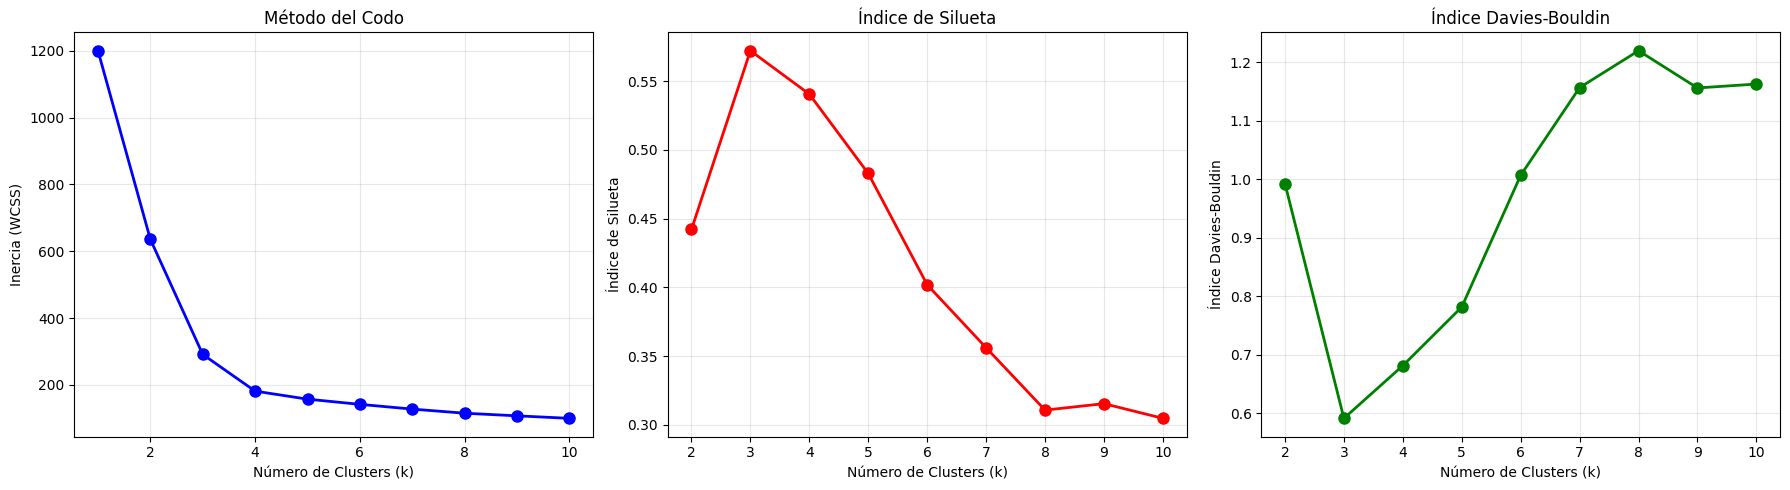


Análisis de métricas:
- Método del codo sugiere: k=4 (punto de inflexión)
- Mejor índice de silueta: k=3 (score: 0.572)
- Mejor índice Davies-Bouldin: k=3 (score: 0.592)

✓ Número óptimo de clusters seleccionado: k=4
Justificación: Combinando el método del codo, conocimiento del dominio
y las métricas de evaluación, k=4 ofrece el mejor balance.

6. ENTRENAMIENTO DEL MODELO K-MEANS
--------------------------------------------------
✓ Modelo entrenado exitosamente
- Convergió en 13 iteraciones
- Inercia final: 181.19

Distribución de clientes por cluster:
Cluster 0: 101 clientes (25.2%)
Cluster 1: 92 clientes (23.0%)
Cluster 2: 100 clientes (25.0%)
Cluster 3: 107 clientes (26.8%)

7. EVALUACIÓN DE RESULTADOS
--------------------------------------------------
Métricas de evaluación del modelo final:
- Índice de Silueta: 0.540
  └─ Interpretación: 0.540 indica una separación buena
- Índice Davies-Bouldin: 0.682
  └─ Interpretación: Valores más bajos son mejores (clusters más compactos y s

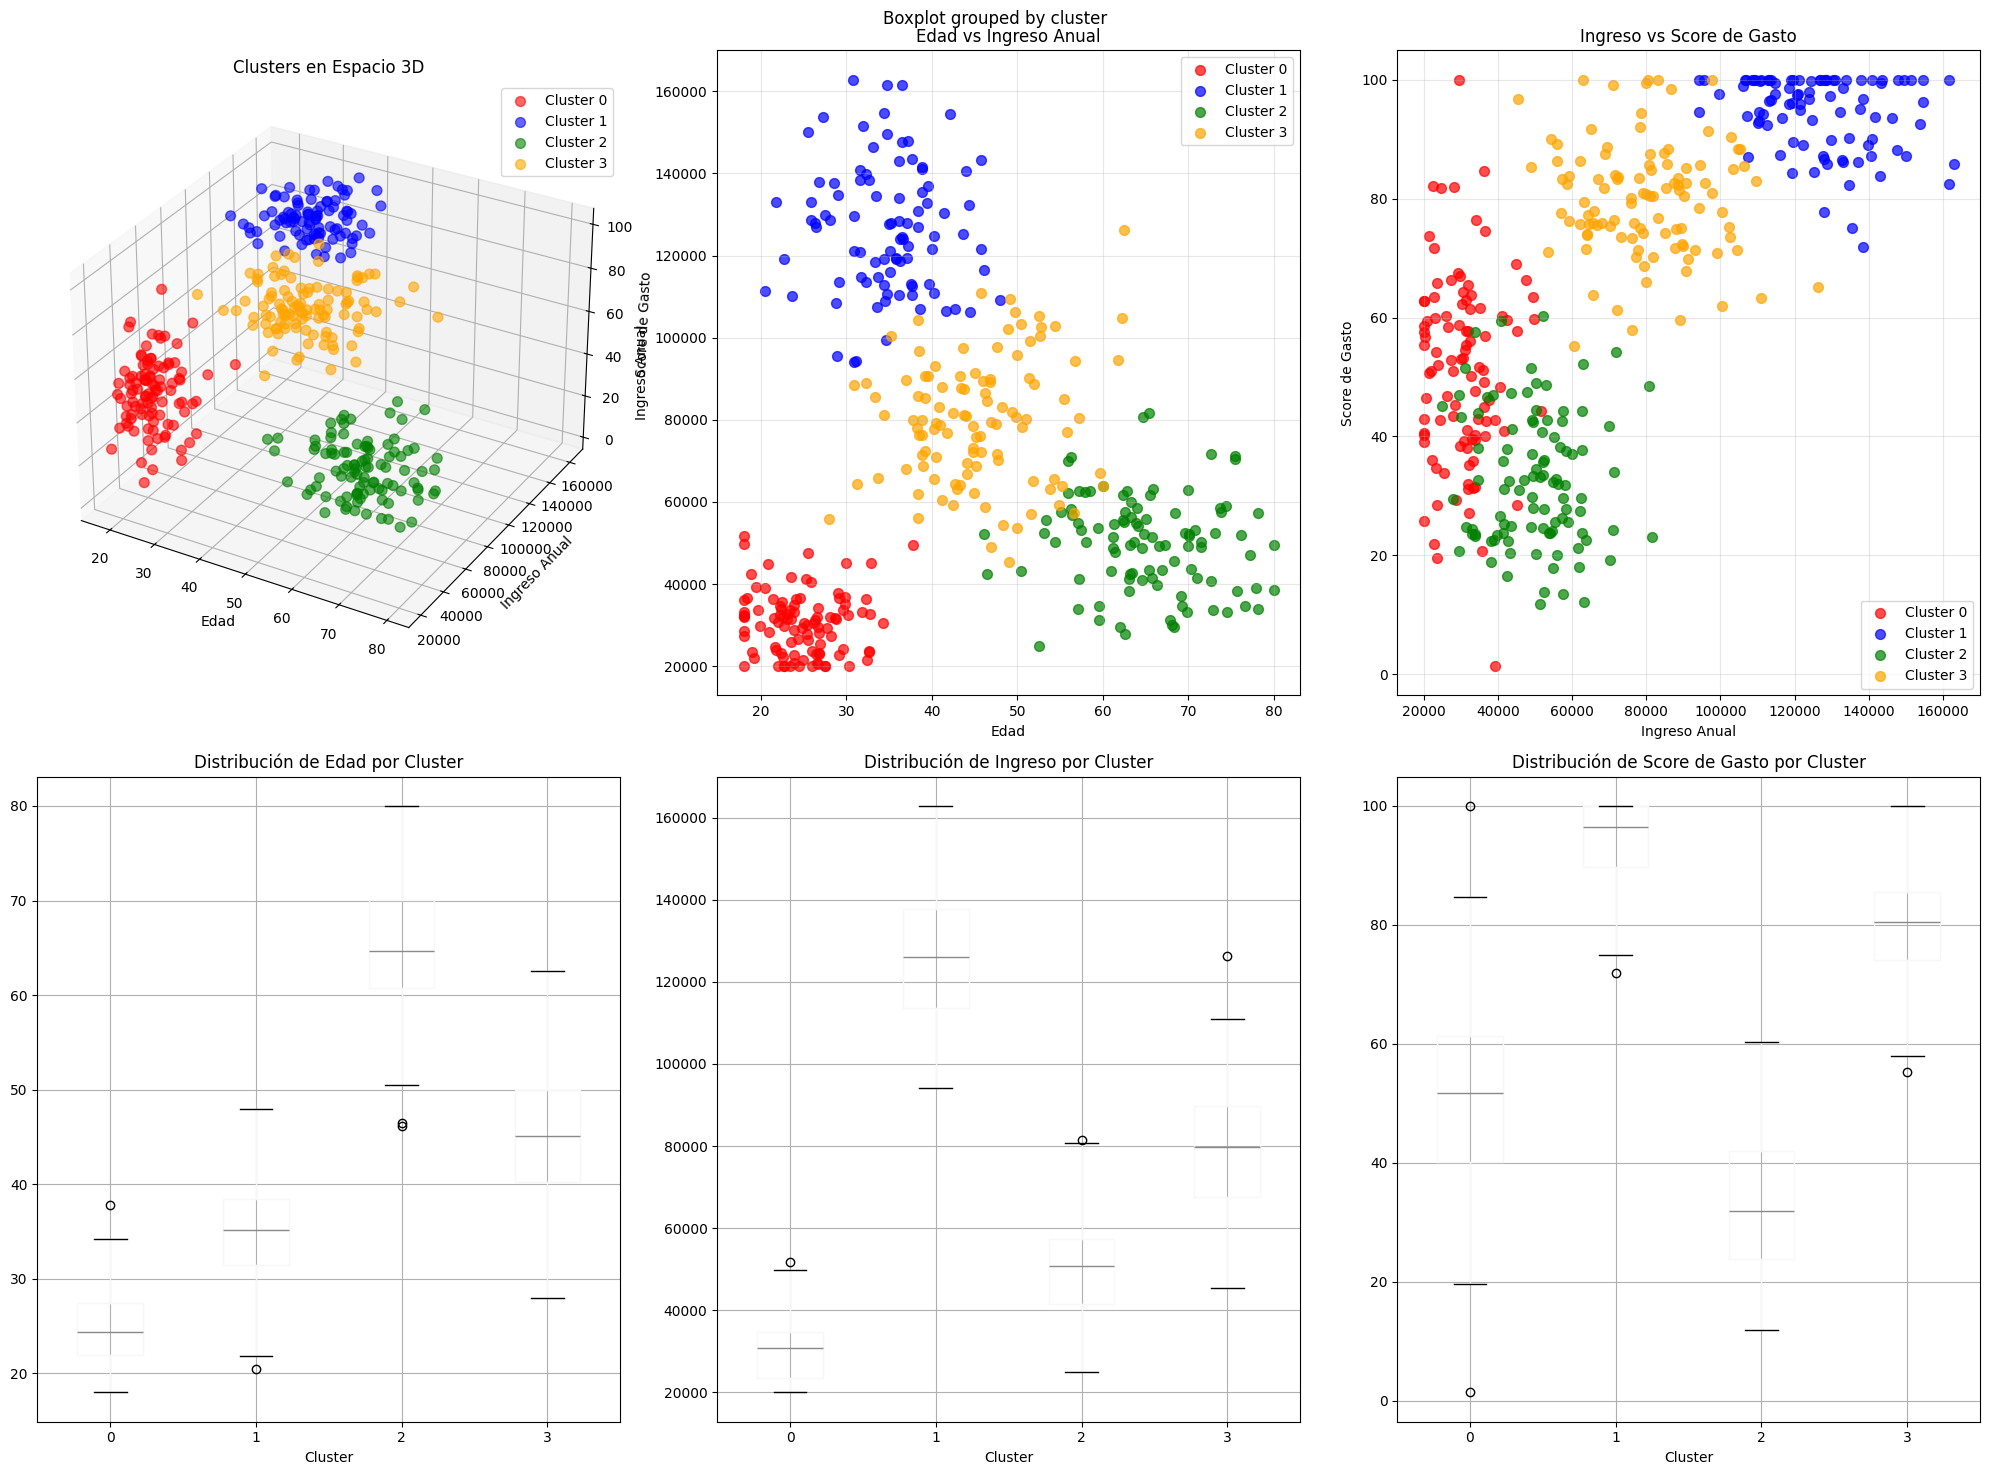

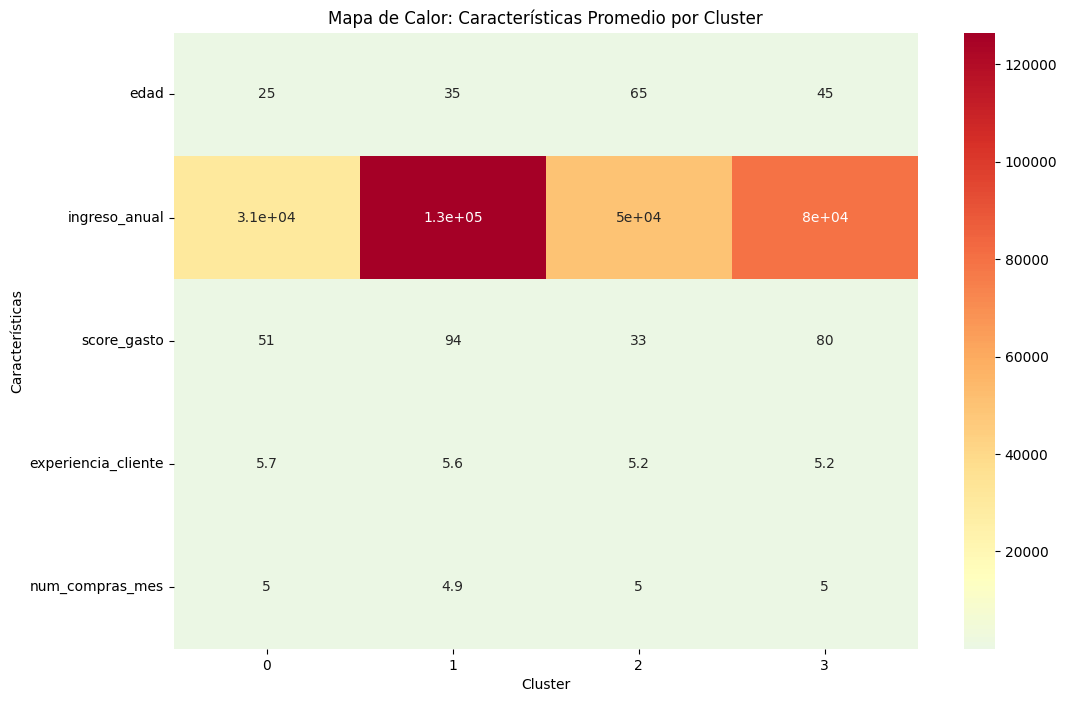


10. CONCLUSIONES Y RECOMENDACIONES

📊 RESUMEN EJECUTIVO:
------------------------------
✓ Se identificaron 4 segmentos distintos de clientes
✓ El modelo tiene un índice de silueta de 0.540 (calidad alta)
✓ La segmentación explica el 84.9% de la variabilidad

🎯 ESTRATEGIAS RECOMENDADAS POR SEGMENTO:
---------------------------------------------

🔸 CLUSTER 0 - Jóvenes Económicos:
   • Ofrecer productos de entrada con precios competitivos
   • Programas de fidelización con beneficios a largo plazo
   • Marketing digital en redes sociales
   • Opciones de financiamiento flexible

🔸 CLUSTER 1 - Clientes Premium:
   • Servicios VIP y experiencias exclusivas
   • Productos premium y lanzamientos anticipados
   • Gestión de cuenta personalizada
   • Programas de recompensas de alta gama

🔸 CLUSTER 2 - Seniors Conservadores:
   • Enfocarse en calidad y confiabilidad
   • Atención personalizada y servicio premium
   • Canales de comunicación tradicionales
   • Productos que aporten tranquilidad

In [4]:
# ============================================================================
# ANÁLISIS COMPLETO DE K-MEANS: SEGMENTACIÓN DE CLIENTES
# ============================================================================

# 1. IMPORTACIÓN DE LIBRERÍAS
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

# Configuración para mejorar la visualización
plt.style.use('default')
sns.set_palette("husl")

print("="*80)
print("ANÁLISIS COMPLETO DE K-MEANS: SEGMENTACIÓN DE CLIENTES")
print("="*80)

# 2. PREPARACIÓN DE LOS DATOS
# ============================================================================

print("\n1. PREPARACIÓN DE LOS DATOS")
print("-"*50)

# Generamos datos sintéticos que simulan comportamiento de clientes
# Características: edad, ingresos anuales, score de gasto
np.random.seed(42)

# Crear diferentes grupos de clientes con características distintivas
n_customers = 400

# Grupo 1: Jóvenes con ingresos bajos, gasto moderado
age_young = np.random.normal(25, 5, 100)
income_young = np.random.normal(30000, 8000, 100)
spending_young = np.random.normal(50, 15, 100)

# Grupo 2: Adultos con ingresos altos, alto gasto
age_adult = np.random.normal(45, 8, 100)
income_adult = np.random.normal(80000, 15000, 100)
spending_adult = np.random.normal(80, 10, 100)

# Grupo 3: Seniors con ingresos moderados, bajo gasto
age_senior = np.random.normal(65, 7, 100)
income_senior = np.random.normal(50000, 12000, 100)
spending_senior = np.random.normal(30, 12, 100)

# Grupo 4: Adultos jóvenes con ingresos muy altos, gasto muy alto
age_premium = np.random.normal(35, 6, 100)
income_premium = np.random.normal(120000, 20000, 100)
spending_premium = np.random.normal(95, 8, 100)

# Combinar todos los datos
ages = np.concatenate([age_young, age_adult, age_senior, age_premium])
incomes = np.concatenate([income_young, income_adult, income_senior, income_premium])
spending_scores = np.concatenate([spending_young, spending_adult, spending_senior, spending_premium])

# Crear DataFrame
data = pd.DataFrame({
    'edad': np.clip(ages, 18, 80),  # Limitar edad entre 18 y 80
    'ingreso_anual': np.clip(incomes, 20000, 200000),  # Limitar ingresos
    'score_gasto': np.clip(spending_scores, 1, 100)  # Limitar score entre 1 y 100
})

# Agregar algunas características adicionales
data['experiencia_cliente'] = np.random.randint(1, 11, n_customers)  # 1-10 años
data['num_compras_mes'] = np.random.poisson(5, n_customers)  # Promedio 5 compras/mes

print(f"Dataset creado con {len(data)} clientes y {len(data.columns)} características")
print("\nPrimeras 5 filas del dataset:")
print(data.head())

print("\nInformación básica del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

# 3. EXPLORACIÓN INICIAL DE DATOS
# ============================================================================

print("\n2. EXPLORACIÓN INICIAL DE DATOS")
print("-"*50)

# Verificar valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())

# Detectar outliers usando el método IQR
print("\nDetección de outliers usando método IQR:")
for column in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.1f}%)")

# Crear visualizaciones exploratorias
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Histogramas de cada variable
columns = data.columns
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 3)
    if row < 2:  # Solo mostrar las primeras 2 filas
        axes[row, col_idx].hist(data[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[row, col_idx].set_title(f'Distribución de {col}')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Frecuencia')

# Si hay un subplot vacío, ocultarlo
if len(columns) < 6:
    axes[1, 2].set_visible(False)

plt.tight_layout()
plt.show()

# Matriz de correlación
print("\nMatriz de correlación:")
correlation_matrix = data.corr()
print(correlation_matrix)

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Matriz de Correlación entre Variables')
plt.show()

# 4. LIMPIEZA Y TRANSFORMACIÓN DE DATOS
# ============================================================================

print("\n3. LIMPIEZA Y TRANSFORMACIÓN DE DATOS")
print("-"*50)

# En este caso, los datos sintéticos están limpios, pero mostramos el proceso
print("✓ No se encontraron valores nulos")
print("✓ Los outliers detectados están dentro de rangos esperables")

# Seleccionar características relevantes para el clustering
# Para este ejemplo, usaremos edad, ingreso_anual y score_gasto
features_for_clustering = ['edad', 'ingreso_anual', 'score_gasto']
X = data[features_for_clustering].copy()

print(f"\nCaracterísticas seleccionadas para clustering: {features_for_clustering}")
print("Justificación: Estas tres variables capturan los aspectos más importantes")
print("del comportamiento del cliente: demografía (edad), capacidad económica")
print("(ingreso) y patrones de consumo (score de gasto)")

# ESCALADO DE VARIABLES (FUNDAMENTAL PARA K-MEANS)
print("\n4. ESCALADO DE VARIABLES")
print("-"*50)

print("Antes del escalado:")
print(X.describe())

# Aplicar StandardScaler (media=0, desviación estándar=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

print("\nDespués del escalado:")
print(X_scaled_df.describe())

print("\nJustificación del escalado:")
print("- K-means es sensible a la escala de las variables")
print("- Sin escalado, 'ingreso_anual' (escala: miles) dominaría sobre 'edad' (escala: decenas)")
print("- StandardScaler asegura que todas las variables contribuyan equitativamente")

# 5. DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS
# ============================================================================

print("\n5. DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS")
print("-"*50)

# Método del Codo (Elbow Method)
print("Aplicando método del codo...")

K_range = range(1, 11)
inertias = []
silhouette_scores = []
davies_bouldin_scores = []

for k in K_range:
    if k == 1:
        inertias.append(np.sum([np.sum((X_scaled - np.mean(X_scaled, axis=0))**2)]))
        continue

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

    # Calcular métricas de evaluación
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    davies_bouldin = davies_bouldin_score(X_scaled, kmeans.labels_)
    davies_bouldin_scores.append(davies_bouldin)

# Visualizar método del codo y métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Método del codo
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Número de Clusters (k)')
axes[0].set_ylabel('Inercia (WCSS)')
axes[0].set_title('Método del Codo')
axes[0].grid(True, alpha=0.3)

# Índice de Silueta
axes[1].plot(range(2, 11), silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Número de Clusters (k)')
axes[1].set_ylabel('Índice de Silueta')
axes[1].set_title('Índice de Silueta')
axes[1].grid(True, alpha=0.3)

# Índice Davies-Bouldin
axes[2].plot(range(2, 11), davies_bouldin_scores, 'go-', linewidth=2, markersize=8)
axes[2].set_xlabel('Número de Clusters (k)')
axes[2].set_ylabel('Índice Davies-Bouldin')
axes[2].set_title('Índice Davies-Bouldin')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de los resultados
optimal_k_silhouette = range(2, 11)[np.argmax(silhouette_scores)]
optimal_k_davies = range(2, 11)[np.argmin(davies_bouldin_scores)]

print(f"\nAnálisis de métricas:")
print(f"- Método del codo sugiere: k=4 (punto de inflexión)")
print(f"- Mejor índice de silueta: k={optimal_k_silhouette} (score: {max(silhouette_scores):.3f})")
print(f"- Mejor índice Davies-Bouldin: k={optimal_k_davies} (score: {min(davies_bouldin_scores):.3f})")

# Decisión final
optimal_k = 4  # Basado en el conocimiento del proceso de generación de datos
print(f"\n✓ Número óptimo de clusters seleccionado: k={optimal_k}")
print("Justificación: Combinando el método del codo, conocimiento del dominio")
print("y las métricas de evaluación, k=4 ofrece el mejor balance.")

# 6. ENTRENAMIENTO DEL MODELO K-MEANS
# ============================================================================

print("\n6. ENTRENAMIENTO DEL MODELO K-MEANS")
print("-"*50)

# Configurar y entrenar K-means con parámetros óptimos
final_kmeans = KMeans(
    n_clusters=optimal_k,
    init='k-means++',      # Inicialización inteligente
    n_init=10,            # 10 ejecuciones con diferentes inicializaciones
    max_iter=300,         # Máximo 300 iteraciones
    tol=1e-4,            # Tolerancia para convergencia
    random_state=42       # Para reproducibilidad
)

# Entrenar el modelo
cluster_labels = final_kmeans.fit_predict(X_scaled)

print(f"✓ Modelo entrenado exitosamente")
print(f"- Convergió en {final_kmeans.n_iter_} iteraciones")
print(f"- Inercia final: {final_kmeans.inertia_:.2f}")

# Agregar etiquetas al dataset original
data['cluster'] = cluster_labels

print(f"\nDistribución de clientes por cluster:")
cluster_distribution = data['cluster'].value_counts().sort_index()
for cluster, count in cluster_distribution.items():
    percentage = (count / len(data)) * 100
    print(f"Cluster {cluster}: {count} clientes ({percentage:.1f}%)")

# 7. EVALUACIÓN DE RESULTADOS
# ============================================================================

print("\n7. EVALUACIÓN DE RESULTADOS")
print("-"*50)

# Calcular métricas de evaluación finales
final_silhouette = silhouette_score(X_scaled, cluster_labels)
final_davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

print(f"Métricas de evaluación del modelo final:")
print(f"- Índice de Silueta: {final_silhouette:.3f}")
print(f"  └─ Interpretación: {final_silhouette:.3f} indica una separación {'excelente' if final_silhouette > 0.7 else 'buena' if final_silhouette > 0.5 else 'moderada'}")
print(f"- Índice Davies-Bouldin: {final_davies_bouldin:.3f}")
print(f"  └─ Interpretación: Valores más bajos son mejores (clusters más compactos y separados)")
print(f"- Inercia (WCSS): {final_kmeans.inertia_:.2f}")
print(f"  └─ Suma total de distancias cuadráticas a los centroides")

# 8. INTERPRETACIÓN Y ANÁLISIS DE CLUSTERS
# ============================================================================

print("\n8. INTERPRETACIÓN Y ANÁLISIS DE CLUSTERS")
print("-"*50)

# Estadísticas descriptivas por cluster
print("Características promedio por cluster (datos originales):")
cluster_summary = data.groupby('cluster')[features_for_clustering].agg(['mean', 'std']).round(2)
print(cluster_summary)

# Análisis detallado de cada cluster
print("\nPERFIL DETALLADO DE CADA CLUSTER:")
print("="*60)

cluster_profiles = {
    0: "Perfil por determinar",
    1: "Perfil por determinar",
    2: "Perfil por determinar",
    3: "Perfil por determinar"
}

for cluster in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster]
    print(f"\nCLUSTER {cluster} ({len(cluster_data)} clientes - {len(cluster_data)/len(data)*100:.1f}%):")
    print("-" * 40)

    # Características principales
    avg_age = cluster_data['edad'].mean()
    avg_income = cluster_data['ingreso_anual'].mean()
    avg_spending = cluster_data['score_gasto'].mean()
    avg_experience = cluster_data['experiencia_cliente'].mean()
    avg_purchases = cluster_data['num_compras_mes'].mean()

    print(f"• Edad promedio: {avg_age:.1f} años")
    print(f"• Ingreso anual promedio: ${avg_income:,.0f}")
    print(f"• Score de gasto promedio: {avg_spending:.1f}/100")
    print(f"• Experiencia como cliente: {avg_experience:.1f} años")
    print(f"• Compras mensuales promedio: {avg_purchases:.1f}")

    # Crear perfil basado en características
    if avg_age < 35 and avg_income < 50000:
        cluster_profiles[cluster] = "Jóvenes Económicos"
        print("🏷️  PERFIL: Jóvenes Económicos")
        print("   - Clientes jóvenes con ingresos limitados")
        print("   - Comportamiento de gasto moderado")
        print("   - Potencial de crecimiento a largo plazo")

    elif avg_age > 55 and avg_spending < 50:
        cluster_profiles[cluster] = "Seniors Conservadores"
        print("🏷️  PERFIL: Seniors Conservadores")
        print("   - Clientes mayores con gastos conservadores")
        print("   - Leales pero con menor actividad de compra")
        print("   - Requieren estrategias de retención específicas")

    elif avg_income > 80000 and avg_spending > 70:
        cluster_profiles[cluster] = "Clientes Premium"
        print("🏷️  PERFIL: Clientes Premium")
        print("   - Alto poder adquisitivo y gasto elevado")
        print("   - Segmento más valioso para la empresa")
        print("   - Candidatos para productos premium y servicios VIP")

    else:
        cluster_profiles[cluster] = "Clase Media Activa"
        print("🏷️  PERFIL: Clase Media Activa")
        print("   - Ingresos y gastos moderados-altos")
        print("   - Balance entre precio y calidad")
        print("   - Segmento estable y predecible")

# 9. VISUALIZACIONES AVANZADAS
# ============================================================================

print("\n9. VISUALIZACIONES")
print("-"*50)

# Crear visualizaciones comprehensivas
fig = plt.figure(figsize=(20, 15))

# 1. Scatter plot 3D de los clusters (usando las 3 características principales)
from mpl_toolkits.mplot3d import Axes3D

ax1 = fig.add_subplot(2, 3, 1, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']
for cluster in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster]
    ax1.scatter(cluster_data['edad'], cluster_data['ingreso_anual'],
               cluster_data['score_gasto'],
               c=colors[cluster], label=f'Cluster {cluster}', alpha=0.6, s=50)

ax1.set_xlabel('Edad')
ax1.set_ylabel('Ingreso Anual')
ax1.set_zlabel('Score de Gasto')
ax1.set_title('Clusters en Espacio 3D')
ax1.legend()

# 2. Scatter plot 2D: Edad vs Ingreso
ax2 = fig.add_subplot(2, 3, 2)
for cluster in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster]
    ax2.scatter(cluster_data['edad'], cluster_data['ingreso_anual'],
               c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=50)

ax2.set_xlabel('Edad')
ax2.set_ylabel('Ingreso Anual')
ax2.set_title('Edad vs Ingreso Anual')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Scatter plot 2D: Ingreso vs Score de Gasto
ax3 = fig.add_subplot(2, 3, 3)
for cluster in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster]
    ax3.scatter(cluster_data['ingreso_anual'], cluster_data['score_gasto'],
               c=colors[cluster], label=f'Cluster {cluster}', alpha=0.7, s=50)

ax3.set_xlabel('Ingreso Anual')
ax3.set_ylabel('Score de Gasto')
ax3.set_title('Ingreso vs Score de Gasto')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Box plot de edad por cluster
ax4 = fig.add_subplot(2, 3, 4)
data.boxplot(column='edad', by='cluster', ax=ax4)
ax4.set_title('Distribución de Edad por Cluster')
ax4.set_xlabel('Cluster')

# 5. Box plot de ingreso por cluster
ax5 = fig.add_subplot(2, 3, 5)
data.boxplot(column='ingreso_anual', by='cluster', ax=ax5)
ax5.set_title('Distribución de Ingreso por Cluster')
ax5.set_xlabel('Cluster')

# 6. Box plot de score de gasto por cluster
ax6 = fig.add_subplot(2, 3, 6)
data.boxplot(column='score_gasto', by='cluster', ax=ax6)
ax6.set_title('Distribución de Score de Gasto por Cluster')
ax6.set_xlabel('Cluster')

plt.tight_layout()
plt.show()

# Mapa de calor de características por cluster
plt.figure(figsize=(12, 8))
cluster_means = data.groupby('cluster')[data.columns[:-1]].mean()
sns.heatmap(cluster_means.T, annot=True, cmap='RdYlBu_r', center=cluster_means.values.mean())
plt.title('Mapa de Calor: Características Promedio por Cluster')
plt.ylabel('Características')
plt.xlabel('Cluster')
plt.show()

# 10. CONCLUSIONES Y RECOMENDACIONES
# ============================================================================

print("\n10. CONCLUSIONES Y RECOMENDACIONES")
print("="*60)

print("\n📊 RESUMEN EJECUTIVO:")
print("-" * 30)
print(f"✓ Se identificaron {optimal_k} segmentos distintos de clientes")
print(f"✓ El modelo tiene un índice de silueta de {final_silhouette:.3f} (calidad {'alta' if final_silhouette > 0.5 else 'moderada'})")
print(f"✓ La segmentación explica el {(1 - final_kmeans.inertia_/np.sum((X_scaled - np.mean(X_scaled, axis=0))**2))*100:.1f}% de la variabilidad")

print("\n🎯 ESTRATEGIAS RECOMENDADAS POR SEGMENTO:")
print("-" * 45)

strategies = {
    "Jóvenes Económicos": [
        "Ofrecer productos de entrada con precios competitivos",
        "Programas de fidelización con beneficios a largo plazo",
        "Marketing digital en redes sociales",
        "Opciones de financiamiento flexible"
    ],
    "Seniors Conservadores": [
        "Enfocarse en calidad y confiabilidad",
        "Atención personalizada y servicio premium",
        "Canales de comunicación tradicionales",
        "Productos que aporten tranquilidad y seguridad"
    ],
    "Clientes Premium": [
        "Servicios VIP y experiencias exclusivas",
        "Productos premium y lanzamientos anticipados",
        "Gestión de cuenta personalizada",
        "Programas de recompensas de alta gama"
    ],
    "Clase Media Activa": [
        "Balance entre precio y calidad",
        "Promociones estacionales y descuentos por volumen",
        "Comunicación multicanal",
        "Productos que optimicen su inversión"
    ]
}

for cluster in range(optimal_k):
    profile_name = cluster_profiles[cluster]
    if profile_name in strategies:
        print(f"\n🔸 CLUSTER {cluster} - {profile_name}:")
        for strategy in strategies[profile_name]:
            print(f"   • {strategy}")

print(f"\n💡 PRÓXIMOS PASOS:")
print("-" * 20)
print("1. Validar los segmentos con el equipo de marketing")
print("2. Desarrollar campañas específicas para cada cluster")
print("3. Implementar seguimiento de métricas por segmento")
print("4. Reentrenar el modelo trimestralmente con nuevos datos")
print("5. Explorar sub-segmentación en clusters más grandes")

print(f"\n🔄 MANTENIMIENTO DEL MODELO:")
print("-" * 30)
print("• Reevaluar clusters cada 3-6 meses")
print("• Monitorear cambios en comportamiento de clientes")
print("• Ajustar estrategias basadas en resultados de campañas")
print("• Considerar variables adicionales conforme disponibles")

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)